This notebook showcases the flow for frontend data filtering and display

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pandas as pd  # noqa: F401
import sys
from pyam import IamDataFrame, Statistics, filter_by_meta  # noqa: F401

sys.path.append('..')
from src.iasa.iiasa_client import IIASABaseAPIClient
from src.iasa.utils import create_df_from_api_response

client = IIASABaseAPIClient()

1st step is filter then return the datapoints.
Filter consists of :
    - geography
    - startYear
    - endYear
    - variable

In [18]:
# global variables, change as you wish.

variable = "Emissions|CO2"
region = "REMIND-MAgPIE 3.2-4.6|Japan"
startYear = 2030
endYear = 2070

In [19]:
# First operation is to get all the datapoints for the main filter, variable, region, year or start and end year pair.

# TODO/IMPROVEMENT:  there is no way to retrieve the run_id instead of model and scenario name, if we got the run__id we could just fetch the meta_indicators based on that, effectively cutting down almost all additional fetches.


data_points = create_df_from_api_response(
    client.get_data(
        "iamc/datapoints/",
        params={
            "join_run_index": "false",
            "join_parameters": "true",
            "join_runs": "true",
            "table": "true"
        },
        body={
            "variable": {"name": variable},
            "region": {"name": region},
            "year__gte": startYear,
            "year__lte": endYear,
        },
    )
)

data_points

,model,scenario,version,region,unit,variable,value,type,step_year,time_series__id,id
3,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,468.7316,ANNUAL,2030,4647742,90580045
5,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,288.8081,ANNUAL,2035,4647742,90580047
4,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,166.0927,ANNUAL,2040,4647742,90580046
7,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,79.6844,ANNUAL,2045,4647742,90580049
6,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,40.5544,ANNUAL,2050,4647742,90580048
1,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,18.4696,ANNUAL,2055,4647742,90580037
0,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,0.0000,ANNUAL,2060,4647742,90580036
2,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,-30.0454,ANNUAL,2070,4647742,90580040
11,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-RC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,462.8450,ANNUAL,2030,4664975,90708613
13,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-RC-1.5°C,1,REMIND-MAgPIE 3.2-4.6|Japan,Mt CO2/yr,Emissions|CO2,268.3296,ANNUAL,2035,4664975,90708615


In [20]:
# second operation is to get all runs filtered for region and variable, twice as fast.
# we need the runs in order to be able to accurately filter the meta indicators.
# if the first proposal, namely adding run__id inside the datapoints doesnt work this endpoint would benefit from also retrieving the scenario name and model name

runs = create_df_from_api_response(client.get_data(
    "runs/",
    params={
        "table": "true"
    },
    body={
        "iamc": {
            "region": {
                "name": region,
            },
            "variable": {"name": variable},
        }
    }
))

runs

,model__id,scenario__id,version,is_default,id,updated_at,updated_by,created_at,created_by
0,17,219,1,True,720,2025-04-07 11:32:40.348256,@unknown,2025-04-07 11:32:02.462291,@unknown
1,17,220,1,True,721,2025-04-07 11:33:16.630525,@unknown,2025-04-07 11:32:40.713571,@unknown
2,17,221,1,True,722,2025-04-07 11:33:52.969627,@unknown,2025-04-07 11:33:16.954413,@unknown
3,17,222,1,True,723,2025-04-07 11:34:29.706826,@unknown,2025-04-07 11:33:53.317379,@unknown
4,17,223,1,True,724,2025-04-07 11:35:06.076119,@unknown,2025-04-07 11:34:30.061466,@unknown


In [21]:
# we need to fetch all models for mapping their name later to the run instance, in current implementation this is also used for getting the count of models.

models = create_df_from_api_response(
    client.get_data(
        "models/",
        params={
            "join_run_index": "false",
            "join_parameters": "true",
            "join_runs": "true",
            "table": "true"
        },
    )
)

models

,name,id,created_at,created_by
0,AIM/CGE V2.2,1,2025-03-28 12:04:24.863850,@unknown
1,MESSAGEix-GLOBIOM 1.1,2,2025-03-28 12:40:19.727393,@unknown
2,IMAGE 3.0,3,2025-03-28 12:59:05.024707,@unknown
3,WITCH 5.0,4,2025-03-28 13:22:19.746918,@unknown
4,COFFEE 1.1,5,2025-03-28 13:34:43.084588,@unknown
5,GEM-E3 V2021,6,2025-03-28 14:11:53.838058,@unknown
6,POLES-JRC ENGAGE,7,2025-03-28 16:44:53.587610,@unknown
7,REMIND-MAgPIE 2.1-4.2,8,2025-04-02 08:18:31.620923,@unknown
8,TIAM-ECN 1.1,9,2025-04-02 10:21:00.357146,@unknown
9,REMIND 3.0,10,2025-04-07 07:41:37.045853,@unknown


In [22]:
# we need to fetch all scenarios for mapping their name later to the run instance, in current implementation this is also used for getting the count of scenarios.

scenarios = create_df_from_api_response(client.get_data(
    "scenarios/",
    params={
        "join_run_index": "false",
        "join_parameters": "true",
        "join_runs": "true",
        "table": "true"
    }
))

scenarios

,name,id,created_at,created_by
0,ENGAGE-INDCi2030-1000f,1,2025-03-28 12:04:24.883425,@unknown
1,ENGAGE-INDCi2030-1200,2,2025-03-28 12:04:39.918461,@unknown
2,ENGAGE-INDCi2030-1200f,3,2025-03-28 12:04:46.039148,@unknown
3,ENGAGE-INDCi2030-1400,4,2025-03-28 12:04:52.911709,@unknown
4,ENGAGE-INDCi2030-1400f,5,2025-03-28 12:04:59.544864,@unknown
...,...,...,...,...
448,LeastTotalCost-NPi-brkLR15-SSP2-P50,449,2025-08-06 18:50:54.913732,@unknown
449,LeastTotalCost-NPi-brkLR15-SSP5-P50,450,2025-08-06 18:51:15.928181,@unknown
450,LeastTotalCost-NPi-brkSR15-SSP1-P50,451,2025-08-06 18:51:33.403214,@unknown
451,LeastTotalCost-NPi-brkSR15-SSP2-P50,452,2025-08-06 18:51:46.465276,@unknown


In [23]:
# this adds the scenario names and model names to the runs, would not have been needed if run endpoints provided name

model_name_map = models.set_index('id')['name'].to_dict()
scenario_name_map = scenarios.set_index('id')['name'].to_dict()

runs_with_names = runs.copy()

runs_with_names['model__name'] = runs_with_names['model__id'].map(model_name_map)
runs_with_names['scenario__name'] = runs_with_names['scenario__id'].map(scenario_name_map)

runs_with_names

,model__id,scenario__id,version,is_default,id,updated_at,updated_by,created_at,created_by,model__name,scenario__name
0,17,219,1,True,720,2025-04-07 11:32:40.348256,@unknown,2025-04-07 11:32:02.462291,@unknown,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-EI-1.5°C
1,17,220,1,True,721,2025-04-07 11:33:16.630525,@unknown,2025-04-07 11:32:40.713571,@unknown,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-MC-1.5°C
2,17,221,1,True,722,2025-04-07 11:33:52.969627,@unknown,2025-04-07 11:33:16.954413,@unknown,REMIND-MAgPIE 3.2-4.6,SHAPE-SDP-RC-1.5°C
3,17,222,1,True,723,2025-04-07 11:34:29.706826,@unknown,2025-04-07 11:33:53.317379,@unknown,REMIND-MAgPIE 3.2-4.6,SHAPE-SSP-NPi
4,17,223,1,True,724,2025-04-07 11:35:06.076119,@unknown,2025-04-07 11:34:30.061466,@unknown,REMIND-MAgPIE 3.2-4.6,SHAPE-SSP2-1.5°C


In [24]:
# add run__id to datapoints, the desired end result

run_mapping = runs_with_names.set_index(['model__name', 'scenario__name'])['id'].to_dict()
datapoints_with_runs = data_points.copy()
datapoints_with_runs['run__id'] = datapoints_with_runs[['model', 'scenario']].apply(
    lambda row: run_mapping.get((row['model'], row['scenario'])), axis=1
)

datapoints_with_runs["run__id"].unique()

array([721, 722, 723, 724, 720])

In [25]:
# getting the meta_indicators for a set of run ids

unique_run_ids = datapoints_with_runs['run__id'].unique()

meta_indicators = create_df_from_api_response(client.get_data(
    "meta/",
    params={
        "table": "True",
        "join_parameters": "true",
        "join_runs": "true",
    },
    body={
        "run": {"id__in": unique_run_ids.tolist()},
    }
))

meta_indicators


,run__id,key,id,value,type
0,720,Project,2769,SHAPE,STR
1,720,Scientific Manuscript (Citation),2770,Soergel et al. (2024),STR
2,720,Scientific Manuscript (DOI),2771,10.1088/1748-9326/ad80af,STR
3,720,Data Source (DOI),2772,10.5281/zenodo.13752116,STR
4,721,Project,2773,SHAPE,STR
...,...,...,...,...,...
320,722,Reason For Concern|Exceeding Prudent Limit For...,112907,ok,STR
321,723,Emissions Diagnostics|Cumulative CCS [2020-210...,112908,1.138331,FLOAT
322,723,Reason For Concern|Exceeding Prudent Limit For...,112909,ok,STR
323,724,Emissions Diagnostics|Cumulative CCS [2020-210...,112910,499.425735,FLOAT


In [26]:
from typing import TypedDict
from collections import defaultdict
from typing import Dict, List


class DataPoint(TypedDict):
    model_name: str
    scenario_name: str
    run_id: str
    value: float
    year: int


class MetaIndicator(TypedDict):
    key: str
    value: str
    run_id: str


class RunInfo(TypedDict):
    model: str
    scenario: str
    run_id: str
    meta_indicators: List[MetaIndicator]
    data_points: List[DataPoint]


In [27]:
typed_data_points: List[DataPoint] = [
    DataPoint(
        model_name=row['model'],
        scenario_name=row['scenario'],
        run_id=row['run__id'],
        value=row['value'],
        year=row['step_year'],
    ) for _, row in datapoints_with_runs.iterrows()
]

typed_meta_indicators: List[MetaIndicator] = [
    MetaIndicator(
        run_id=row['run__id'],
        value=row['value'],
        key=row['key'],
    ) for _, row in meta_indicators.iterrows()
]

data_points_by_run: Dict[str, List[DataPoint]] = defaultdict(list)
for dp in typed_data_points:
    data_points_by_run[dp['run_id']].append(dp)

meta_indicators_by_run: Dict[str, List[MetaIndicator]] = defaultdict(list)
for mi in typed_meta_indicators:
    meta_indicators_by_run[mi['run_id']].append(mi)

typed_runs: List[RunInfo] = []
for _, row in datapoints_with_runs.drop_duplicates(subset=['run__id']).iterrows():
    typed_runs.append(RunInfo(
        model=row['model'],
        scenario=row['scenario'],
        run_id=row['run__id'],
        meta_indicators=meta_indicators_by_run.get(row['run__id'], []),
        data_points=data_points_by_run.get(row['run__id'], []),
    ))

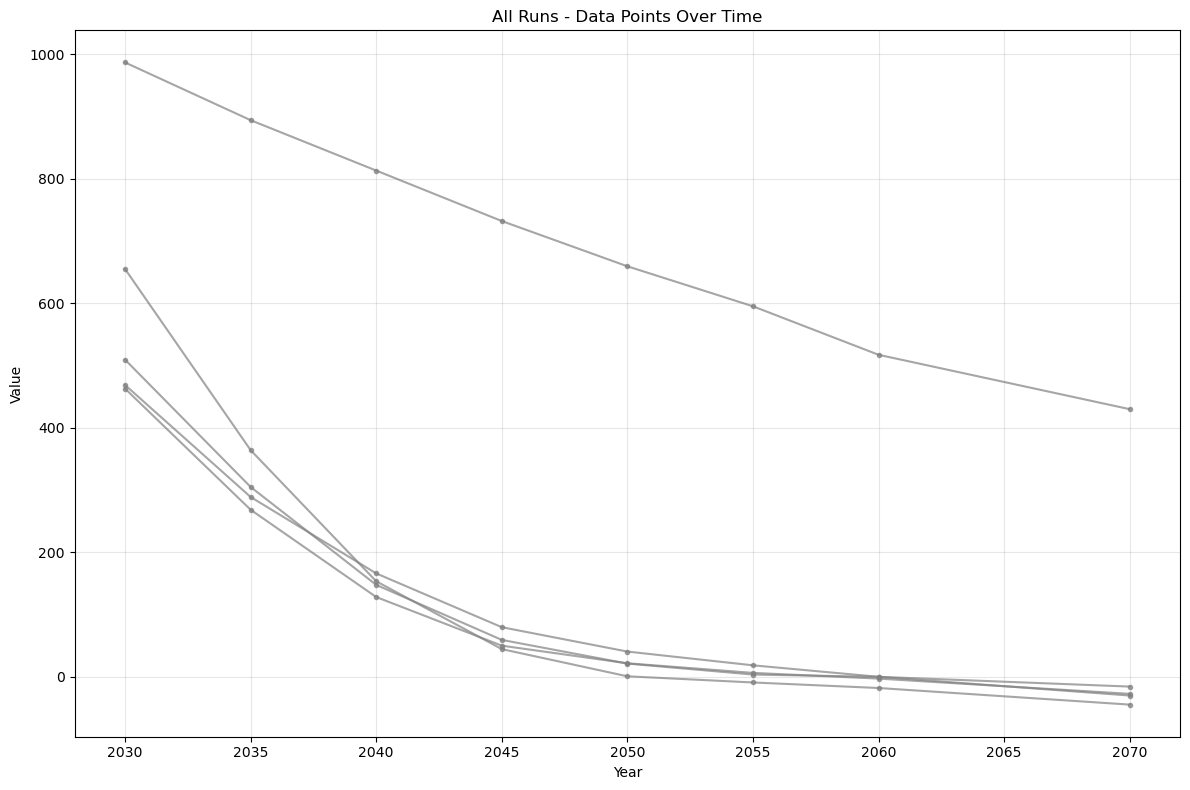

In [28]:
import matplotlib.pyplot as plt


def plot_all_runs(typed_runs: List[RunInfo]):
    """Plot all runs on the same figure without legend"""
    plt.figure(figsize=(12, 8))

    for run in typed_runs:
        if run['data_points']:
            years = [dp['year'] for dp in run['data_points']]
            values = [dp['value'] for dp in run['data_points']]

            sorted_data = sorted(zip(years, values))
            years_sorted, values_sorted = zip(*sorted_data) if sorted_data else ([], [])

            plt.plot(years_sorted, values_sorted, marker='o', linewidth=1.5, markersize=3, alpha=0.7, color='gray')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('All Runs - Data Points Over Time')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_all_runs(typed_runs)

In [29]:
def find_runs_with_reason_for_concern(typed_runs: List[RunInfo]) -> List[dict]:
    """Find runs that have meta indicators with 'Reason For Concern' in the key/name"""
    concern_data = []

    for run in typed_runs:
        if run['meta_indicators']:  # Check if run has meta indicators
            for meta_indicator in run['meta_indicators']:
                # Check if 'Reason For Concern' is in the key/name
                if 'Reason For Concern' in meta_indicator['key']:
                    concern_data.append({
                        'run_id': run['run_id'],
                        'indicator_key': meta_indicator['key'],
                        'value': meta_indicator['value']
                    })

    return concern_data


concern_data = find_runs_with_reason_for_concern(typed_runs)

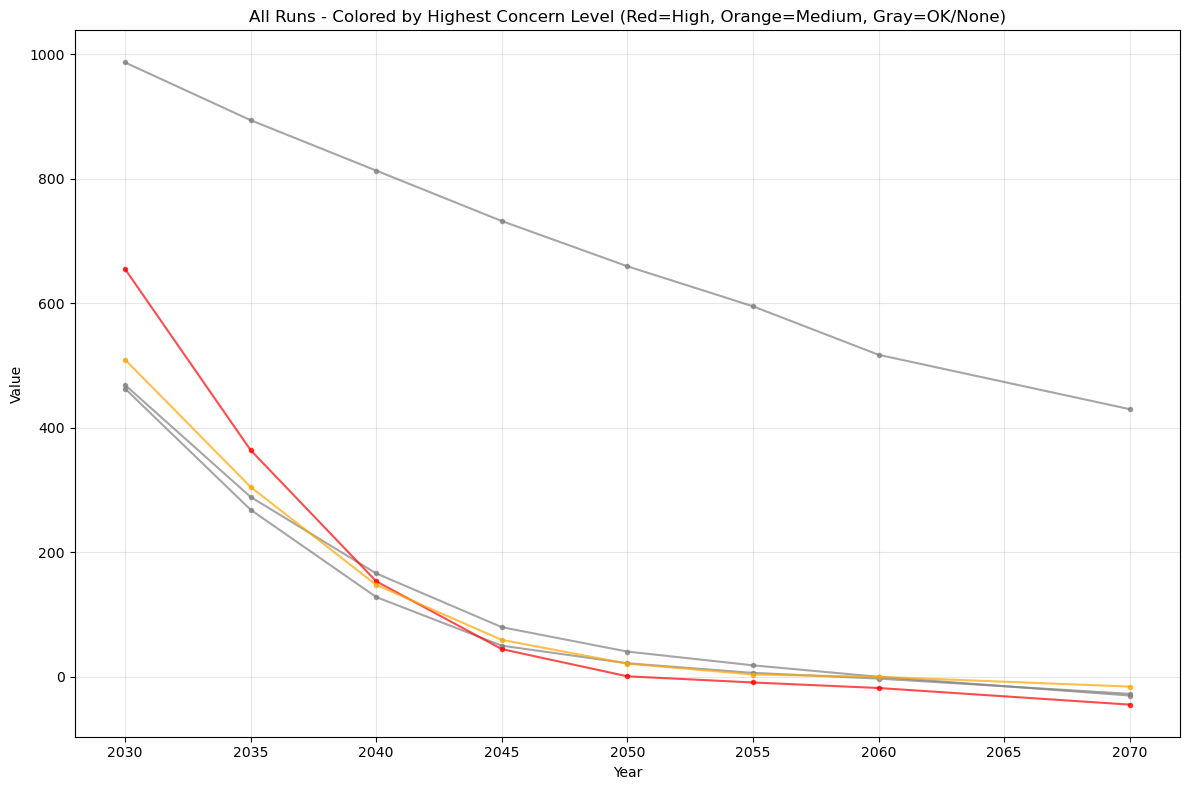

In [30]:
def plot_all_runs_with_concern_colors(typed_runs: List[RunInfo]):
    plt.figure(figsize=(12, 8))

    concern_data = find_runs_with_reason_for_concern(typed_runs)

    run_concern_levels = {}
    for item in concern_data:
        run_id = item['run_id']
        value = item['value'].lower()

        if run_id not in run_concern_levels:
            run_concern_levels[run_id] = value
        else:
            current = run_concern_levels[run_id]
            if value == 'high' or (current != 'high' and value == 'medium'):
                run_concern_levels[run_id] = value

    for run in typed_runs:
        if run['data_points']:
            years = [dp['year'] for dp in run['data_points']]
            values = [dp['value'] for dp in run['data_points']]

            sorted_data = sorted(zip(years, values))
            years_sorted, values_sorted = zip(*sorted_data) if sorted_data else ([], [])

            run_id = run['run_id']
            if run_id in run_concern_levels:
                concern_level = run_concern_levels[run_id]
                if concern_level == 'high':
                    color = 'red'
                elif concern_level == 'medium':
                    color = 'orange'
                else:
                    color = 'gray'
            else:
                color = 'gray'

            plt.plot(years_sorted, values_sorted, marker='o', linewidth=1.5,
                     markersize=3, alpha=0.7, color=color)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('All Runs - Colored by Highest Concern Level (Red=High, Orange=Medium, Gray=OK/None)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_all_runs_with_concern_colors(typed_runs)